# Lançamento de projéteis: uma introdução

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 14 de Setembro de 2022

O objetivo deste `Notebook` é introduzirmos o lançamento de projéteis, como o nome já indica. Descreveremos o problema e, a medida que formos prosseguindo, adicionaremos mais complexidade nele.

Dito isto, este `Notebook` estará dividido em três seções principais:
1. A descrição do lançamento de um projétil
2. A resistência do ar
3. Adicionando mais um grau de complexidade: a densidade do ar

Agora vamos as bibliotecas e ao `Notebook` de fato.

### Importando as bibliotecas necessárias

Neste `Notebook`, utilizaremos as bibliotecas `matplotlib`, `numpy` e `scipy`. Definirei também uma função chamada `opt_plot()` para melhorar o plot dos gráficos, a qual peguei emprestada dos `Notebooks` de meu colega de projeto (o link para seus `Notebooks` pode ser encontrado [aqui](https://github.com/GabrielWendell/PET.py/)).

In [1]:
import matplotlib.pyplot as plt
import scipy.constants as sconst
import numpy as np

def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

### Detalhes das bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Scipy

Software versions
Python 3.9.12 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.2.0
OS Windows 10 10.0.19042 SP0
Matplotlib 3.5.1
Numpy 1.21.5
Scipy 1.7.3
Tue Sep 13 03:59:05 2022 Hora Padrão de Buenos Aires

## 1. A descrição do lançamento de um projétil

Bom, primeiramente nos perguntemos: qual a maneira mais simples que temos de descrevermos um projétil? Queremos imaginar um projétil que seja disparado de algum lugar, com certa velocidade e ângulos específicos dados no início do lançamento.

Para responder a pergunta, faremos o que sempre é feito na física como um todo: abstrair o problema e tentar examinar-lo sem muitos graus de complexidade. Isto será feito para que possamos obter uma descrição mais fundamental (e também mais simples) do problema. Sendo assim, partiremos pra descrição física que o leitor já deve estar habituado: a de um lançamento oblíquo (não entrarei em detalhes neste `Notebook` sobre esta descrição, já que ela pode ser encontrada em vários lugares da internet).

Sendo assim, podemos descrever o projétil em sua forma mais fundamental com as seguintes equações diferenciais:

$$
\frac{d^2x}{dt^2} = 0,
$$
$$
\frac{d^2y}{dt^2} = -g.
$$

Essas equações diferenciais são simples de se resolver analiticamente e nos levam a solução conhecida para lançamentos oblíquos. Mas não iremos resolver nada analiticamente por aqui! Para resolver estas equações, utilizaremos o método de Runge-Kutta. 

Em geral, utilizaremos este método para as diferentes equações diferenciais que aparecerão neste `Notebook`, então cabe uma seção para relembrarmos o método.

### 1.1. O método de Runge Kutta de 4ª ordem

Recordemos como é enunciado o método de Runge-Kutta de 4ª ordem (RK4).

Seja um problema de valor inicial especificado tal que:

$$
y' = f(t, y), \ \ y(t_0) = y_0.
$$

Então o método RK4 para este problema é dado pelas seguintes equações:

$$
y_{n+1} = y_{n} + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4),
$$

$$
t_{n+1} = t_{n} + h,
$$

onde $y_{n+1}$ é a aproximação por RK4 de $y(t_{n+1})$, e

$$
k_1 = f(t_n,y_n),
$$
$$
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1),
$$
$$
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2),
$$
$$
k_4 = f(t_n + h, y_n + hk_3).
$$

### 1.2. Resolvendo o lançamento simples de um projétil

Primeiramente, por fins práticos, escreveremos nossas equações desta forma:

$$
\frac{dx}{dt} = v_x,
$$
$$
\frac{dv_x}{dt} = 0,
$$
$$
\frac{dy}{dt} = v_y,
$$
$$
\frac{dv_y}{dt} = -g,
$$

onde $v_x$ e $v_y$ são as velocidades em $x$ e em $y$, respectivamente.

Dado o nosso problema, teremos uma função $f$ para cada uma das 4 EDO's originadas. Portanto:

$$
f_x = v_x,
$$

$$
f_{v_x} = 0,
$$

$$
f_y = v_y,
$$

$$
f_{v_y} = -g.
$$

Agora, é necessário que tenhamos um problema de valor inicial. Isto é, devemos ter os valores iniciais (em $t=0$) de $x$, $v_x$, $y$ e $v_y$. Para que não seja necessário utilizarmos velocidades em $x$ e em $y$, especificaremos o ângulo de lançamento inicial $\theta_0$ em relação ao eixo $x$ e a velocidade inicial $v_0$ (módulo do vetor velocidade) para as condições iniciais do nosso problema. Assim, as velocidades iniciais em cada eixo poderão ser dadas através das relações $v_x(t=0) = v_0 \cdot cos(\theta_0)$ e $v_y(t=0) = v_0 \cdot sin(\theta_0)$.

Partindo pro problema, considere que estamos tentando atirar uma bola de canhão esférica. Considerando que uma bola de canhão tem sua velocidade de saída dada em cerca de 512 m/s (ref. [3]), utilizaremos os seguintes valores para $t = 0$ no nosso problema:

|      | Valores iniciais |
|:-----:|:-------:|
|   $v_0$   | 512 m/s |
| $\theta_0$ |   30°, 40°, 50°, 60°   |
|   $x$   |    0    |
|   $y$   |    0    |

Como computaremos 4 conjuntos de dados diferentes, devido aos diferentes ângulos iniciais que estamos tomando, em código, colocamos da seguinte maneira:

In [3]:
v0 = 512
theta0 = np.array([30*np.pi/180, 40*np.pi/180, 50*np.pi/180, 60*np.pi/180])
x, y = 0, 0

vx0 = v0*np.cos(theta0)
vy0 = v0*np.sin(theta0)

Para o valor da constante gravitacional, utilizaremos o valor contido no `scipy.constants`, equivalente a $g \approx 9.81 \ m/s^2$.

Agora, resta implementarmos o método RK4. Para isso, definiremos múltiplas arrays `r`, que conterão todos os valores iniciais, definiremos o range de tempo para avaliar nossas equações e o número de pontos que usaremos.

In [4]:
r30 = np.array([x, vx0[0], y, vy0[0]],float)
r40 = np.array([x, vx0[1], y, vy0[1]],float)
r50 = np.array([x, vx0[2], y, vy0[2]],float)
r60 = np.array([x, vx0[3], y, vy0[3]],float)
t1, t2 = 0, 100.0
N = 5000
h = (t2-t1)/N

Conforme o código acima, iremos avaliar 5000 pontos dentro de um range de tempo de $t = 0$ até $t = 100s$.

Definiremos, também, nossa função `f`, que receberá como parâmetro a array `r` (que leva consigo os valores de $x$, $v_x$, $y$ e $v_y$). Esta função terá como retorno uma outra array com os valores de $f_x$, $f_{v_x}$, $f_y$ e $f_{v_y}$. É importante definirmos esta função, já que ela é diretamente necessária para a execução do método RK4.

In [5]:
def f(r,t):
    x, vx, y, vy = r[0],r[1],r[2],r[3]

    fx = vx
    fvx = 0
    fy = vy
    fvy = -sconst.g

    return np.array([fx, fvx, fy, fvy], float)

Agora, implementaremos a função que executará o método RK4.

In [6]:
def RK4(r,t):
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    return r+(1/6)*(k1+2*k2+2*k3+k4)

Agora, resta rodarmos o código, computarmos os valores e plotarmos os gráficos. Faremos assim:

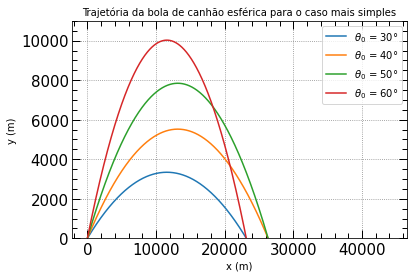

In [7]:
# Definindo as listas que conterão os pontos x e y
tempos = np.linspace(t1, t2, N)
xpoints_30 = []
ypoints_30 = []
xpoints_40 = []
ypoints_40 = []
xpoints_50 = []
ypoints_50 = []
xpoints_60 = []
ypoints_60 = []

# Computando os valores pelo método RK4
for t in tempos:
    r30 = RK4(r30,t)
    r40 = RK4(r40,t)
    r50 = RK4(r50,t)
    r60 = RK4(r60,t)

    xpoints_30.append(r30[0])
    ypoints_30.append(r30[2])
    xpoints_40.append(r40[0])
    ypoints_40.append(r40[2])
    xpoints_50.append(r50[0])
    ypoints_50.append(r50[2])
    xpoints_60.append(r60[0])
    ypoints_60.append(r60[2])

# Plotando os gráficos das trajetórias
opt_plot()
plt.title("Trajetória da bola de canhão esférica para o caso mais simples", fontsize = 10)
plt.plot(xpoints_30, ypoints_30, label = "$\\theta_0$ = 30°")
plt.plot(xpoints_40, ypoints_40, label = "$\\theta_0$ = 40°")
plt.plot(xpoints_50, ypoints_50, label = "$\\theta_0$ = 50°")
plt.plot(xpoints_60, ypoints_60, label = "$\\theta_0$ = 60°")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.ylim(0, 1.1e4)
plt.show()

Bom, é natural pensar: esta é mesmo uma boa aproximação da realidade? Resposta: definitivamente não. Nos falta mais complexidade, como a que temos no mundo real.

E o que adicionaremos agora, afim de melhorar nossas aproximações? O ar. Ou melhor, a resistência do ar.

## 2. A resistência do ar

A resistência do ar, ou simplesmente o arrasto (drag), é um tipo de força resistiva que atua contrária ao sentido do movimento. Isto é, atua sempre no sentido contrário a velocidade.

Poderíamos passar um bom tempo discutindo sobre este tópico, já que ele pode se tornar complexo o suficiente para isso. Mas aqui não faremos isso. Indo direto ao ponto, fato é que precisamos de um modelo para a força de arrasto do ar.

De maneira bem grosseira, podemos dizer que a força resistiva do ar tem a seguinte forma:

$$
F_{drag} \approx -B_1v - B_2v^2
$$

Isto é, é uma força que leva diretamente o módulo da velocidade em consideração, diferente das forças de atrito comuns. O leitor pode notar, ainda, que a relação acima nos lembra uma expansão de Taylor e isso está correto! Para baixas velocidades, o primeiro termo é predominante, enquanto para velocidades um pouco mais altas, o segundo termo começa a ser mais predominante. Em geral, o segundo termo costuma ser bem mais relevante na maioria dos casos e é ele que usaremos em nossas aproximações.

Ainda, notemos que existem constantes de proporcionalidades envolvidas nestas aproximações. E, claro, devemos estimar estas constantes. Em particular, enquanto a constante $B_1$ pode ser determinada para objetos com forma simples em velocidades muito baixas (Lei de Stokes), a constante $B_2$, a qual estamos interessados, é difícil de ser calculada mesmo nos casos mais simples. É possível, entretanto, fazermos uma aproximação de seu valor. Faremos exatamente isso.

Enquanto um objeto se move pelo ar, ele deve puxar o ar em sua frente para tal, movendo uma certa massa de ar. A quantidade infinitesimal de massa de ar movida pode ser dada por $dm_{ar} = \rho\ dV$, onde $\rho$ é a densidade do ar e $dV$ é o volume da massa de ar movida (e também o volume do objeto). Com isso, podemos estimar a taxa de massa de ar movida em um tempo $dt$: 

$$
\frac{dm_{ar}}{dt} \sim \rho \frac{dV}{dt} \backsim \rho A v,
$$
onde A é a área frontal do objeto.

Estimando uma velocidade de ordem $v$ para o ar, podemos estimar que a energia cinética de uma massa $dm_{ar}$ será dada na ordem de:

$$
K_{ar} \sim \frac{1}{2}dm_{ar}v^2,
$$

que também corresponde a expressão para o trabalho realizado pela força de arrasto do ar:

$$
K_{ar} = F_{drag}vdt.
$$

Juntando todas as equações e aproximações que fizemos, encontramos que:

$$
F_{drag} \sim \frac{1}{2} \rho A v^2,
$$

e podemos fazer nossa estimativa de que:

$$
F_{drag} \approx -\frac{1}{2} C \rho A v^2,
$$

onde $C$ é chamado de coeficiente de arrasto ou coeficiente de resistência aerodinâmica. Em nossa aproximação acima, tínhamos simplesmente que $C = 1$. Entretanto, nosso cálculo foi apenas uma estimativa. De fato, nossa expressão tem uma dependência clara de $v$, $A$ e de $\rho$, entretanto não é tão simples saber o valor de $C$. E, bom, como em nossos cálculos não determinamos a geometria do objeto, é plausível supor que $C$ dependerá da forma do objeto.

Agora que estimamos uma expressão para $B_2$ e temos uma expressão funcional para o arrasto do ar, voltemos a nossos cálculos.

### 2.1. Voltando ao trabalho

Vamos escrever nossas equações novamente, agora considerando que temos uma força de arrasto do ar contrária ao movimento. Para isso, olhemos a seguinte figura:

![](../Imagens/Lan%C3%A7amento%20de%20proj%C3%A9teis%2C%20uma%20introdu%C3%A7%C3%A3o/airdrag_diagram.png)

Fica fácil de notar que se $F_{drag} = -B_2v^2$, então:

$$
F_{drag_x} = F_{drag_x}cos(\theta) = F_{drag_x}(v_x/v) = -B_2vv_x,
$$
$$
F_{drag_y} = F_{drag_y}sin(\theta) = F_{drag_y}(v_y/v) = -B_2vv_y.
$$

Agora, escrevemos novamente nossas equações do movimento:

$$
m\frac{d^2x}{dt^2} = -B_2vv_x,
$$
$$
m\frac{d^2y}{dt^2} = -mg-B_2vv_y,
$$

que nos dão as seguintes equações diferenciais:

$$
\frac{dx}{dt} = v_x,
$$
$$
\frac{dv_x}{dt} = -\frac{B_2}{m}vv_x,
$$
$$
\frac{dy}{dt} = v_y,
$$
$$
\frac{dv_y}{dt} = -g-\frac{B_2}{m}vv_y.
$$

Agora, novamente, nos resta apenas determinarmos as condições iniciais do problema e o resolvermos. As condições iniciais de lançamento serão as mesmas da seção anterior, nos restando então calcular apenas a razão $B_2/m$. 

Como obtivemos a expressão para $B_2$ acima, a utilizaremos aqui considerando os seguintes valores para nossa bola de canhão esférica:

|      | Valores |
|:-----:|:-------:|
|   $R$   | 10 cm |
| $C$ |   0.47   |
|   $\rho$   |    1.2041 kg/m³    |
|   $m$   |    10 kg    |

Os valores de $R$ e de $m$ foram estimados grosseiramente com base no tamanho e no peso que uma bola de canhão deveria ter, enquanto os valores de $C$ e $\rho$ foram retirados, respectivamente, das referências [4] e [5]. O valor de $C$ é dado para um corpo esférico em meio a um fluido de número de Reynolds da ordem de $10^4$, enquanto o valor de $\rho$ é dado para a densidade do ar a temperatura de 20°C a uma pressão de 1 atm.

Em código, faremos:

In [8]:
R = 0.10
C = 0.47
rho_0 = 1.2041
m = 10
b2_m = 1/2*C*rho_0*np.pi*R*R/m

print("O valor de B₂/m é:", b2_m)

O valor de B₂/m é: 0.0008889560528340555


Agora, resta rodarmos o código e plotarmos os gráficos. Faremos analogamente ao caso anterior, definindo as variáveis iniciais em diferentes arrays `r`, gerando uma nova função `f` e por aí. Não mexeremos em nada nas condições iniciais de lançamento, já que elas permanecem as mesmas.

In [9]:
r30_air = np.array([x, vx0[0], y, vy0[0]],float)
r40_air = np.array([x, vx0[1], y, vy0[1]],float)
r50_air = np.array([x, vx0[2], y, vy0[2]],float)
r60_air = np.array([x, vx0[3], y, vy0[3]],float)
t1, t2 = 0, 100.0
N = 5000
h = (t2-t1)/N

def f(r,t):
    x, vx, y, vy = r[0],r[1],r[2],r[3]

    v = np.sqrt(vx*vx + vy*vy)

    fx = vx
    fvx = -b2_m*v*vx
    fy = vy
    fvy = -sconst.g-b2_m*v*vy

    return np.array([fx, fvx, fy, fvy], float)

Por fim, vamos ao plot:

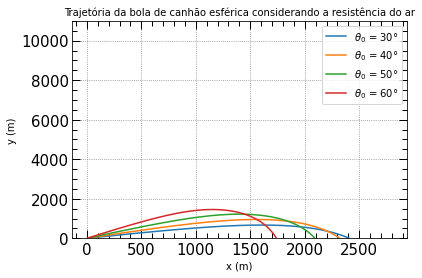

In [10]:
# Definindo as listas que conterão os pontos x e y
tempos = np.linspace(t1, t2, N)
xpoints_30_air = []
ypoints_30_air = []
xpoints_40_air = []
ypoints_40_air = []
xpoints_50_air = []
ypoints_50_air = []
xpoints_60_air = []
ypoints_60_air = []

# Computando os valores pelo método RK4
for t in tempos:
    r30_air = RK4(r30_air,t)
    r40_air = RK4(r40_air,t)
    r50_air = RK4(r50_air,t)
    r60_air = RK4(r60_air,t)

    xpoints_30_air.append(r30_air[0])
    ypoints_30_air.append(r30_air[2])
    xpoints_40_air.append(r40_air[0])
    ypoints_40_air.append(r40_air[2])
    xpoints_50_air.append(r50_air[0])
    ypoints_50_air.append(r50_air[2])
    xpoints_60_air.append(r60_air[0])
    ypoints_60_air.append(r60_air[2])

# Plotando os gráficos das trajetórias
opt_plot()
plt.title("Trajetória da bola de canhão esférica considerando a resistência do ar", fontsize = 10)
plt.plot(xpoints_30_air, ypoints_30_air, label = "$\\theta_0$ = 30°")
plt.plot(xpoints_40_air, ypoints_40_air, label = "$\\theta_0$ = 40°")
plt.plot(xpoints_50_air, ypoints_50_air, label = "$\\theta_0$ = 50°")
plt.plot(xpoints_60_air, ypoints_60_air, label = "$\\theta_0$ = 60°")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.ylim(0, 1.1e4)
plt.show()

Primeiramente, vamos as duas coisas mais óbvias que aconteceram em relação ao gráfico anterior: os alcances verticais e horizontais se encurtaram bastante. De fato, se compararmos os dois gráficos, há uma diferença brusca em relação a isso.

Agora, no mínimo, obtivemos estimativas pelo menos um pouco mais realistas. Entretanto, este `Notebook` ainda adicionará outra camada de complexidade.

## 3. Adicionando mais um grau de complexidade: a densidade do ar

De fato, quando paramos pra pensar, a força de arrasto do ar depende da densidade do ar. Sabemos que a densidade do ar varia com a altitude, de forma que quanto menos "ar", mais fácil deve ser para um objeto fazer sua trajetória. Sendo assim, a pergunta que devemos fazer para nossos fins aproximativos é: como a densidade do ar varia com a altitude?

Existem diversas formas de responder esta pergunta. Uma delas, talvez a mais simples, consiste em considerar a atmosfera como um gás ideal isotérmico. Fazendo estas considerações, e assumindo que toda a pressão é hidrostática, obteremos que a pressão deverá estar na seguinte forma (na referência [6] o leitor encontrará a derivação desta equação, caso tenha interesse):

$$
P = P_0\ e^{-mgy/k_bT},
$$

onde $m$ é a massa média de uma molécula de ar, $y$ é a altura de um determinado ponto de referência (como o nível do mar, por exemplo), $k_b$ é a constante de Boltzmann, e $T$ é a temperatura absoluta (lembre-se que consideramos a atmosfera *isotérmica*).

Para um gás ideal, a pressão é proporcional a densidade, o que nos leva a seguinte expressão:

$$
\rho = \rho_0\ e^{-mgy/k_bT},
$$

onde $mg/k_bT \approx 1.0 \times 10^{-4}$ m.

Entretanto, este modelo isotérmico nos trás alguns problemas justamente pelo fato de ser um modelo isotérmico. Sabemos que a temperatura pode variar bastante de acordo com a altitude, como por exemplo no topo do Monte Everest, o que nos trás alguns problemas para altitudes da ordem de 10 km ou mais (troposfera).

Um modelo um pouco mais realista nesse sentido se dá considerando que o ar é um mal condutor de calor e que a convecção é muito lenta, nos levando para a chamada aproximação adiabática, que traz resultados melhores neste caso (na ref. [7] é possível encontrar a derivação desta relação).

A expressão para a densidade do ar é dada, para este tipo de modelo, da seguinte forma:

$$
\rho = \rho_0 \bigg(1-\frac{ay}{T_0}\bigg)^\alpha,
$$

onde a constante $a \approx 6.5 \times 10^{-3}$ K/m ajusta os dados bem, $T_0$ é a temperatura no nível do mar em Kelvin, e $\alpha = 2.5$ para o ar.

No mais, seja lá como você responda a pergunta de como a densidade varia com a altitude, fato é que escreveremos numericamente a força de arrasto do ar como:

$$
F^*_{drag} = \frac{\rho}{\rho_0}F_{drag}(y = 0),
$$

onde $F_{drag}(y=0)$ é a força de arrasto no nível do mar, dado pela expressão que já estávamos habituados na seção anterior.

Olhando para a relação acima, é fácil ver como escreveríamos as equações do movimentos para este caso. Basta incluirmos o termo $\rho/\rho_0$ nelas. Assim, ficamos com as seguintes equações do movimento:

$$
\frac{dx}{dt} = v_x,
$$
$$
\frac{dv_x}{dt} = -\frac{\rho}{\rho_0}\frac{B_2}{m}vv_x,
$$
$$
\frac{dy}{dt} = v_y,
$$
$$
\frac{dv_y}{dt} = -g-\frac{\rho}{\rho_0}\frac{B_2}{m}vv_y.
$$

Utilizaremos o modelo adiabático nesta seção para plotarmos nossos gráficos, já que ele é evidentemente mais preciso. Consideraremos a temperatura a nível do mar como 20°C e a densidade do ar também a nível do mar como 1.2041 kg/m³. 

Coloquemos em código:

In [11]:
def rho(y):
    a = 6.5 * 10**(-3)
    T0 = 293.15
    rho_0 = 1.2041
    alpha = 2.5
    return rho_0*(1-a*y/T0)**alpha

De resto, faremos as mesmas coisas que já fizemos antes. Apenas, desta vez, utilizaremos apenas os ângulos de 30° e de 60° a fim de não deixar o gráfico muito carregado. Vamos ao código.

In [12]:
r30_airdcorrected = np.array([x, vx0[0], y, vy0[0]],float)
r60_airdcorrected = np.array([x, vx0[3], y, vy0[3]],float)
t1, t2 = 0, 100.0
N = 5000
h = (t2-t1)/N

def f(r,t):
    x, vx, y, vy = r[0],r[1],r[2],r[3]

    v = np.sqrt(vx*vx + vy*vy)

    fx = vx
    fvx = -rho(y)/rho_0*b2_m*v*vx
    fy = vy
    fvy = -sconst.g-rho(y)/rho_0*b2_m*v*vy

    return np.array([fx, fvx, fy, fvy], float)

Por fim, rodaremos o código e vamos ao plot.

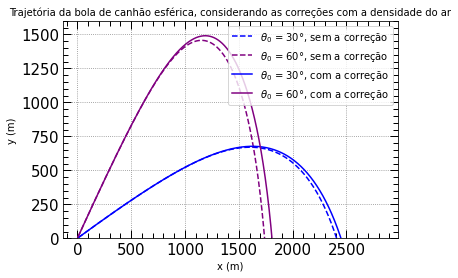

In [13]:
# Definindo as listas que conterão os pontos x e y
tempos = np.linspace(t1, t2, N)
xpoints_30_airdcorrected = []
ypoints_30_airdcorrected = []
xpoints_60_airdcorrected = []
ypoints_60_airdcorrected = []

# Computando os valores pelo método RK4
for t in tempos:
    r30_airdcorrected = RK4(r30_airdcorrected,t)
    r60_airdcorrected = RK4(r60_airdcorrected,t)

    xpoints_30_airdcorrected.append(r30_airdcorrected[0])
    ypoints_30_airdcorrected.append(r30_airdcorrected[2])
    xpoints_60_airdcorrected.append(r60_airdcorrected[0])
    ypoints_60_airdcorrected.append(r60_airdcorrected[2])

# Plotando os gráficos das trajetórias
opt_plot()
plt.title("Trajetória da bola de canhão esférica, considerando as correções com a densidade do ar", fontsize = 10)
plt.plot(xpoints_30_air, ypoints_30_air, color = "blue", linestyle='dashed', label = "$\\theta_0$ = 30°, sem a correção")
plt.plot(xpoints_60_air, ypoints_60_air, color = "purple", linestyle='dashed', label = "$\\theta_0$ = 60°, sem a correção")
plt.plot(xpoints_30_airdcorrected, ypoints_30_airdcorrected, color = "blue", label = "$\\theta_0$ = 30°, com a correção")
plt.plot(xpoints_60_airdcorrected, ypoints_60_airdcorrected, color = "purple", label = "$\\theta_0$ = 60°, com a correção")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.ylim(0, 1.6e3)
plt.show()

Percebe como a trajetória teve um leve aumento do alcance máximo vertical e horizontal desde que adicionamos a correção da densidade do ar?

E as camadas de complexidade nem de longe acabam por aí. De fato, podemos aproximar tanto quanto quisermos este tipo de problema adicionando mais e mais variáveis dentro do "jogo".

### Conclusão

Entretanto, este `Notebook` fica por aqui. Deixo, nesta conclusão, uma menção a referência [1], que é a referência em que me baseei para a confecção deste `Notebook`.

E fica o questionamento para o leitor: como poderíamos adicionar ainda mais complexidade em nossa descrição? E se, por exemplo, colocassemos um objeto pra girar enquanto o lançamos? Que efeito a resistência do ar traria neste caso?

Bom, é com essas indagações que, finalmente, este `Notebook` termina.

## Referências

**[1]** *Giordano, N. J., & Nakanishi, H. (2006). Computational physics.*

**[2]** <https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods>

**[3]** <https://www.arc.id.au/CannonBallistics.html>

**[4]** *Hoerner, Sighard F. (1965). [Fluid-Dynamic Drag : Practical Information on Aerodynamic Drag and Hydrodynamic Resistance](https://archive.org/details/FluidDynamicDragHoerner1965) (2 ed.).*

**[5]** <https://en.wikipedia.org/wiki/Density_of_air>

**[6]** <https://en.wikipedia.org/wiki/Barometric_formula>

**[7]** <https://farside.ph.utexas.edu/teaching/sm1/lectures/node56.html>